# Прогнозирование и оптимизация складских остатков

Базовая кафедра: Кафедра логистических систем и технологий  
Обучающийся: Шмунь М.С., Б03-907а  
Научный руководитель: Старостин Е.А.  


Управление запасами на складе является сложной задачей, требующей постоянного мониторинга, анализа и прогнозирования спроса. Недостаточное количество товаров на складе может привести к потере клиентов и упущенной выгоде, а избыток товаров может привести к непроданным запасам и потерям. Традиционные методы управления запасами, такие как методы EOQ (экономичный заказ количества), MiniMax и др., могут не учитывать все факторы, влияющие на спрос, такие как сезонность, новые тренды и изменения в поведении потребителей.

Прогнозирование на основе более сложных эконометрических моделей позволит учитывать в прогнозах сезонные и экзогенные факторы, а также локальные изменения трендов. Кроме того, на основании таких моделей можно строить и вероятностные модели диапазона спроса в будущем, что может быть полезно для разработки дефицитных или избыточных стратегий пополнения запасов

Ключевые составляющие в стратегии оптимизации складских остатков:

0. Сбор и подготовка статистических данных о спросе, ~~остатках~~ и прочих факторах  
1. Точное прогнозирование спроса  
2. ~~Точное прогнозирование сроков поставки товара~~  
3. Ключевые показатели эффективности управления запасами:
- оборачиваемость  
- уровень сервиса 1 и 2 рода  
- потери от упущенного спроса, дефицита~~, списаний товаров с истекшим сроком реализациии~~  
- затраты на хранение  
4. ~~(Для категорий Fresh) учет срока годности товаров~~

## 0. Сбор и подготовка данных  

Выбранный период: 2021 год - 2023 год (1 кв.). 2021-2022 годы будут использоваться для моделирования, а 1 кв. 2023 будет использоваться для оценки прогнозирования  
Исследуемый географический кластер: Екатеринбург  
Исследуемые категории:  
- Смартфон Apple  
- Подгузники детские
- Корм сухой для собак
- Автохимия - Масло моторное
- Чехол для смартфона
- Детская литература
- Конфеты
- Футболка мужская
- Витаминно-минеральные комплексы
- Компьютерные и офисные кресла

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')




In [3]:
SAMPLE_RATIO = 0.7
RANDOM_SEED = 10924

In [4]:
# основной датасет

sales = pd.read_excel("sales.xlsx", engine="openpyxl")
sales['week']=sales['week'].astype('datetime64[ns]')
sales.set_index(['week'], inplace=True)
sales

,Name,Sales,Items
week,,,
2020-12-28,Витаминно-минеральные комплексы,6.404326e+04,97
2021-01-04,Витаминно-минеральные комплексы,1.396709e+05,264
2021-01-11,Витаминно-минеральные комплексы,2.541849e+05,353
2021-01-18,Витаминно-минеральные комплексы,2.187481e+05,302
2021-01-25,Витаминно-минеральные комплексы,2.164894e+05,376
...,...,...,...
2023-02-27,Чехол для смартфона,3.412227e+06,11830
2023-03-06,Чехол для смартфона,2.941951e+06,9771
2023-03-13,Чехол для смартфона,2.991658e+06,9987


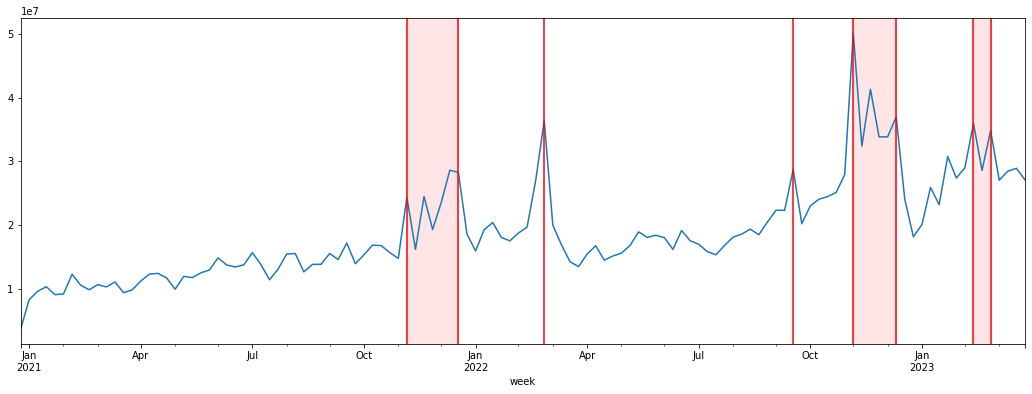

In [5]:
fig, ax = plt.subplots(figsize=(18, 6))
sales['Sales'].groupby('week').sum().plot(ax=ax)

marketing = [
    ['2023-02-08', '2023-02-23'],
    ['2022-11-01', '2022-12-12'],
    ['2021-11-04', '2021-12-20'],
]

for m in marketing:
    plt.axvline(x = m[0], color = 'r')
    plt.axvline(x = m[1], color = 'r')
    ax.axvspan(m[0], m[1], color='r', alpha=0.1)
    
anomaly = ['2022-02-22', '2022-09-19']

for a in anomaly: 
    plt.axvline(x = a, color = 'r')
    


In [5]:
sales.describe()

,Sales,Items
count,1.062000e+03,1062.000000
mean,2.106197e+06,2220.781544
std,2.141115e+06,2249.317737
min,4.800439e+04,12.000000
25%,5.154126e+05,437.500000
50%,1.236426e+06,1628.000000
75%,3.196209e+06,3179.750000
max,1.705661e+07,13011.000000


In [6]:
# Товарные категории в датасете
set(sales['Name'])

{'Витаминно-минеральные комплексы',
 'Детская литература',
 'Компьютерные и офисные кресла',
 'Конфеты',
 'Корм сухой для собак',
 'Подгузники детские',
 'Смартфон Apple',
 'Футболка мужская',
 'Чехол для смартфона'}

In [7]:
colors = {
    'Витаминно-минеральные комплексы': "b",
    'Детская литература': "g",
    'Компьютерные и офисные кресла':"r",
    'Конфеты':"c",
    'Корм сухой для собак':"m",
    'Подгузники детские': "y",
    'Смартфон Apple':"k",
    'Футболка мужская':"w",
    'Чехол для смартфона': 'tab:olive'
}

In [ ]:
marketing_affect = 

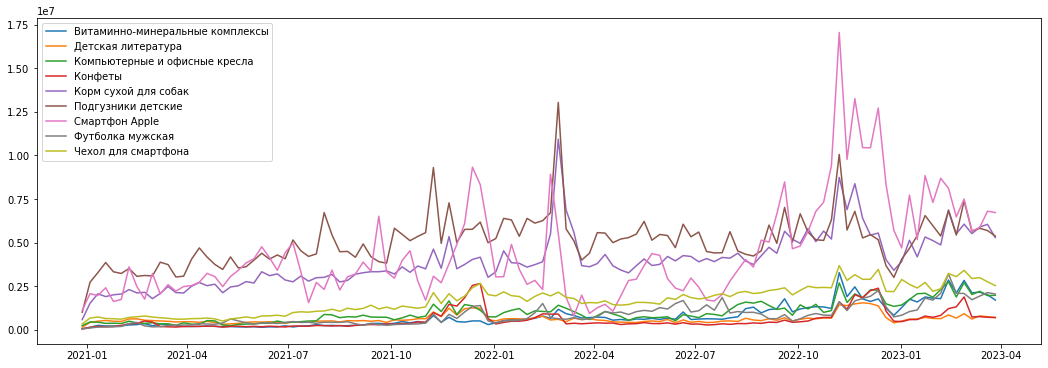

In [8]:
# динамика товарных категорий в датасете 

fig, ax = plt.subplots(figsize=(18, 6))

for cat, color in colors.items():
    ax.plot(sales[sales['Name']==cat].index, sales[sales['Name']==cat]['Sales'], label=cat)
    

ax.legend()


plt.show()




In [9]:
# выборка по одной категории

df = sales[sales['Name']=='Конфеты'].copy()
# df.reset_index(inplace=True)
df

,Name,Sales,Items
week,,,
2020-12-28,Конфеты,5.661449e+04,211
2021-01-04,Конфеты,1.394073e+05,503
2021-01-11,Конфеты,1.939951e+05,662
2021-01-18,Конфеты,1.810986e+05,613
2021-01-25,Конфеты,1.902215e+05,673
...,...,...,...
2023-02-27,Конфеты,1.888275e+06,8657
2023-03-06,Конфеты,7.382501e+05,3067
2023-03-13,Конфеты,7.560524e+05,3126


<AxesSubplot:xlabel='week'>

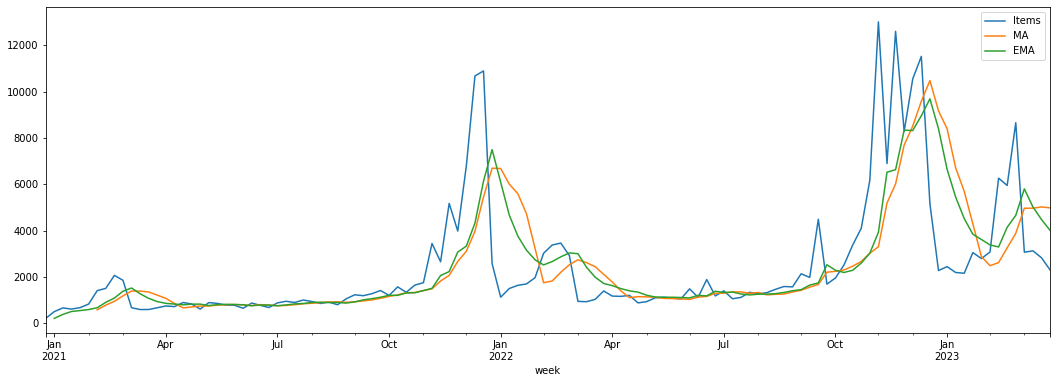

In [10]:
# Скользящие среднее и экспоненциальное среднее с глубиной depth

depth = 6

df['MA']=df['Items'].rolling(window=depth).mean().shift(1)
df['EMA']=df['Items'].ewm(span=depth).mean().shift(1)
df[['Items', 'MA', 'EMA']].plot(figsize=(18, 6))

In [11]:
import statsmodels.api as sm
import numpy as np

In [12]:
# тест на наличие единичных корней - стационарность

from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [13]:
# тест на отсутствие единичных корней - нестационарность

from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [14]:
# тесты исходного ряда

adf_test(df['Items'])

kpss_test(df['Items'])

# вывод - ряд нестационарен

Results of Dickey-Fuller Test:
Test Statistic                  -3.139132
p-value                          0.023790
#Lags Used                       1.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64
Results of KPSS Test:
Test Statistic           0.680417
p-value                  0.015326
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                -1.372043e+01
p-value                        1.190727e-25
#Lags Used                     0.000000e+00
Number of Observations Used    1.160000e+02
Critical Value (1%)           -3.488022e+00
Critical Value (5%)           -2.886797e+00
Critical Value (10%)          -2.580241e+00
dtype: float64
Results of KPSS Test:
Test Statistic           0.026071
p-value                  0.100000
Lags Used                1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


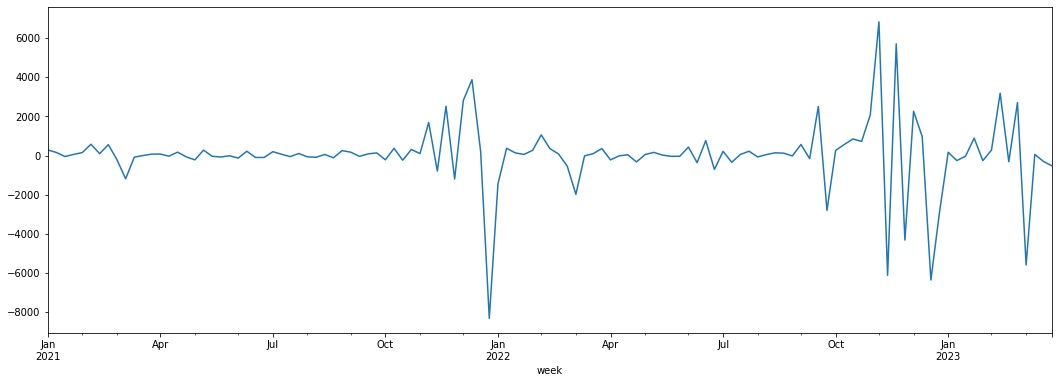

In [15]:
# тест ряда первых разностей от исходного ряда

diff = (df['Items']-df['Items'].shift(1)).dropna()

diff.plot(figsize=(18, 6))

adf_test(diff)

kpss_test(diff)

# вывод - ряд разностей стационарен, т.е. в исходном ряде есть линейный тренд

<AxesSubplot:xlabel='week'>

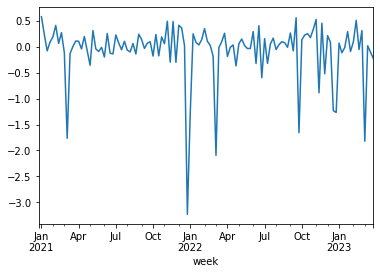

In [18]:
(diff/df['Items']).plot()

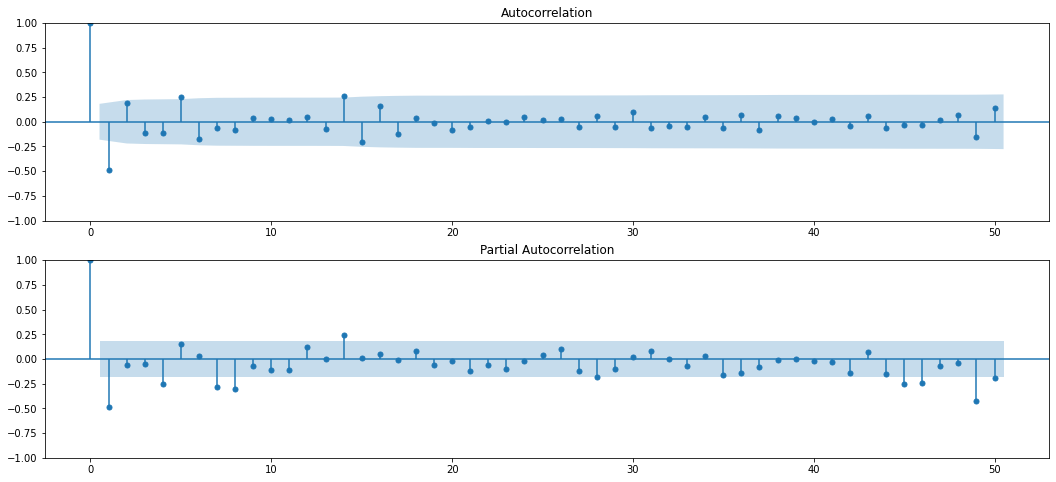

In [75]:
# Автокорелляция и частичная автокорелляция для определения порядка в ARMA

fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff.values.squeeze(), lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff, lags=50, ax=ax2)

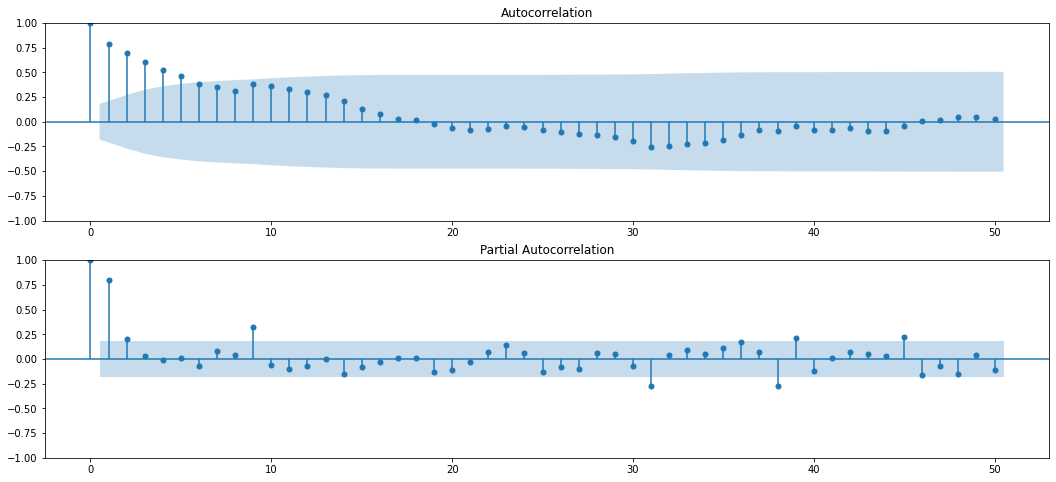

In [53]:
# Автокорелляция и частичная автокорелляция исхожного ряда для определения порядка в ARMA

fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Items'].values.squeeze(), lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Items'], lags=50, ax=ax2)

In [113]:
model_data = df['Items']

forecast = pd.DataFrame()
forecast['Fact'] = df['Items'].loc['2023-01-01':]
forecast['MA'] = df['MA']['2023-01-01':].round().astype('int')
forecast['EMA']=df['EMA']['2023-01-01':].round().astype('int')

In [132]:
# ARIMA

fit_res = sm.tsa.ARIMA(model_data[:'2022-12-26'], order=(8,1,1), trend='t').fit()
model = sm.tsa.ARIMA(model_data, order=(8,1,1), trend='t').filter(fit_res.params)

print( model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Items   No. Observations:                  118
Model:                 ARIMA(8, 1, 1)   Log Likelihood                -603.232
Date:                Mon, 12 Jun 2023   AIC                           1228.463
Time:                        20:43:16   BIC                           1258.847
Sample:                    12-28-2020   HQIC                          1240.799
                         - 03-27-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9952      1.521      1.312      0.189      -0.985       4.975
ar.L1          0.0360      0.346      0.104      0.917      -0.642       0.714
ar.L2          0.2354      0.168      1.405      0.1

In [133]:
# Прогноз "One-step-ahead" для каждой недели (основан на предыдущих значениях)

predict = model.get_prediction()
predict_ci = predict.conf_int(alpha=0.1)
ci = predict_ci.loc['2023-01-01':]

# Прогноз на квартал от 1 января 2023

predict_dy = model.get_prediction(dynamic='2023-01-02')
predict_dy_ci = predict_dy.conf_int(alpha=0.1)
dy_ci = predict_dy_ci.loc['2023-01-01':]

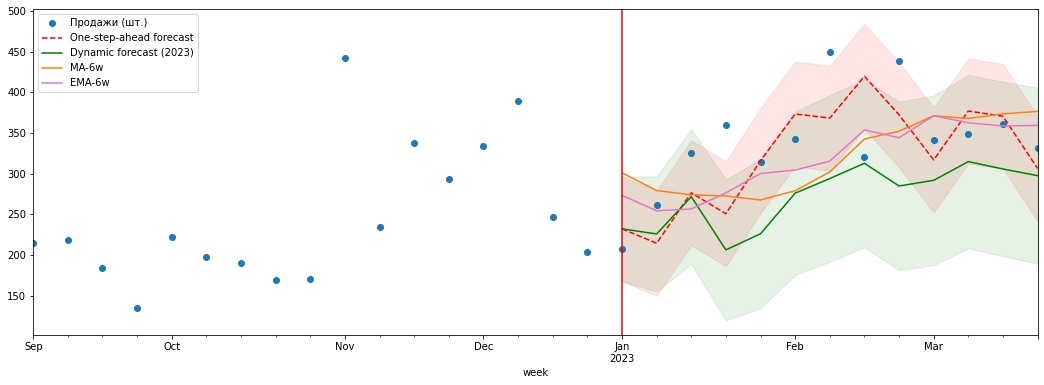

In [134]:
# Совместные графики прогнозов

fig, ax = plt.subplots(figsize=(18, 6))
model_data['2022-09-01':].plot(ax=ax, style='o', label="Продажи (шт.)")

predict.predicted_mean['2023-01-01':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)

predict_dy.predicted_mean.loc['2023-01-01':].plot(ax=ax, style='g', label='Dynamic forecast (2023)')
ax.fill_between(ci.index, dy_ci.iloc[:,0], dy_ci.iloc[:,1], color='g', alpha=0.1)


df['MA']['2023-01-01':].plot(ax=ax,color='tab:orange', label=f'MA-{depth}w')
df['EMA']['2023-01-01':].plot(ax=ax,color='tab:pink', label=f'EMA-{depth}w')

plt.axvline(x = '2022-12-31', color = 'r')


ax.legend()
plt.show()

forecast['ARIMA']=predict.predicted_mean['2023-01-01':].round().astype('int')
forecast['ARIMA90']= dy_ci.iloc[:,1]['2023-01-01':].round().astype('int')

In [136]:
%%time

#SARIMA 
fit_res = sm.tsa.statespace.SARIMAX(model_data[:'2022-12-26'], order=(8,1,1), seasonal_order=(0,1,1,2), trend='t').fit(maxiter=250)

sarima_model = sm.tsa.statespace.SARIMAX(model_data, order=(8,1,1), seasonal_order=(0,1,1,2), trend='t').filter(fit_res.params)

print(sarima_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Items   No. Observations:                  118
Model:             SARIMAX(8, 1, 1)x(0, 1, 1, 2)   Log Likelihood                -594.932
Date:                           Mon, 12 Jun 2023   AIC                           1213.864
Time:                                   20:44:17   BIC                           1246.803
Sample:                               12-28-2020   HQIC                          1227.234
                                    - 03-27-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0014      0.002      0.795      0.426      -0.002       0.005
ar.L1          0.0307      0.368      0.083

In [137]:
predict = sarima_model.get_prediction()
predict_ci = predict.conf_int(alpha=0.1)
ci = predict_ci.loc['2023-01-01':]

predict_dy = sarima_model.get_prediction(dynamic='2023-01-02')
predict_dy_ci = predict_dy.conf_int(alpha=0.1)
dy_ci = predict_dy_ci.loc['2023-01-01':]

204


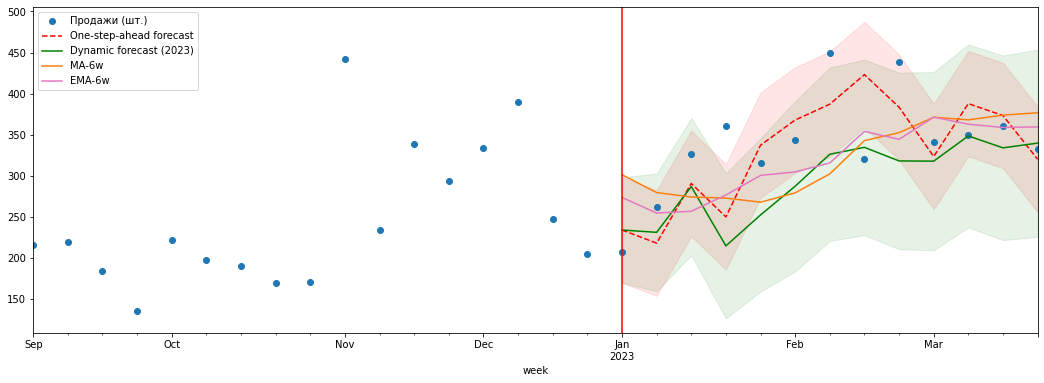

In [138]:
const = model_data[:'2022-12-26'][-1]
print(const)

fig, ax = plt.subplots(figsize=(18, 6))
model_data['2022-09-01':].plot(ax=ax, style='o', label="Продажи (шт.)")

(predict.predicted_mean['2023-01-01':]).plot(ax=ax, style='r--', label='One-step-ahead forecast')
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)

(predict_dy.predicted_mean.loc['2023-01-01':]).plot(ax=ax, style='g', label='Dynamic forecast (2023)')
ax.fill_between(ci.index, dy_ci.iloc[:,0], dy_ci.iloc[:,1], color='g', alpha=0.1)


df['MA']['2023-01-01':].plot(ax=ax,color='tab:orange', label=f'MA-{depth}w')
df['EMA']['2023-01-01':].plot(ax=ax,color='tab:pink', label=f'EMA-{depth}w')


plt.axvline(x = '2022-12-31', color = 'r')

ax.legend()
plt.show()

forecast['SARIMA']=predict.predicted_mean['2023-01-01':].round().astype('int')
forecast['SARIMA90']= dy_ci.iloc[:,1]['2023-01-01':].round().astype('int')

In [139]:
df['Marketing']=df.index.map(lambda x: 
                 int(pd.Timestamp(marketing[0][0]) <= x <= pd.Timestamp(marketing[0][1]) 
                 or pd.Timestamp(marketing[1][0]) <= x <= pd.Timestamp(marketing[1][1])
                 or pd.Timestamp(marketing[2][0]) <= x <= pd.Timestamp(marketing[2][1]))
            ).astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 2020-12-28 to 2023-03-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       118 non-null    object 
 1   Sales      118 non-null    float64
 2   Items      118 non-null    int64  
 3   MA         112 non-null    float64
 4   EMA        117 non-null    float64
 5   Marketing  118 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 11.5+ KB


In [140]:
%%time

#ARIMAX 
fit_res = sm.tsa.statespace.SARIMAX(model_data[:'2022-12-26'], exog=df['Marketing'][:'2022-12-26'], order=(8,1,1), trend='t').fit()
arimax_model = sm.tsa.statespace.SARIMAX(model_data, exog=df['Marketing'], order=(8,1,1), trend='t').filter(fit_res.params)

print(arimax_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Items   No. Observations:                  118
Model:               SARIMAX(8, 1, 1)   Log Likelihood                -602.892
Date:                Mon, 12 Jun 2023   AIC                           1229.785
Time:                        20:44:37   BIC                           1262.931
Sample:                    12-28-2020   HQIC                          1243.242
                         - 03-27-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0107      0.004      2.536      0.011       0.002       0.019
Marketing    137.8310      9.237     14.922      0.000     119.727     155.935
ar.L1          0.3372      0.067      5.056      0.0

In [141]:
predict = arimax_model.get_prediction()
predict_ci = predict.conf_int(alpha=0.1)
ci = predict_ci.loc['2023-01-01':]

predict_dy = arimax_model.get_prediction(dynamic='2023-01-02')
predict_dy_ci = predict_dy.conf_int(alpha=0.1)
dy_ci = predict_dy_ci.loc['2023-01-01':]

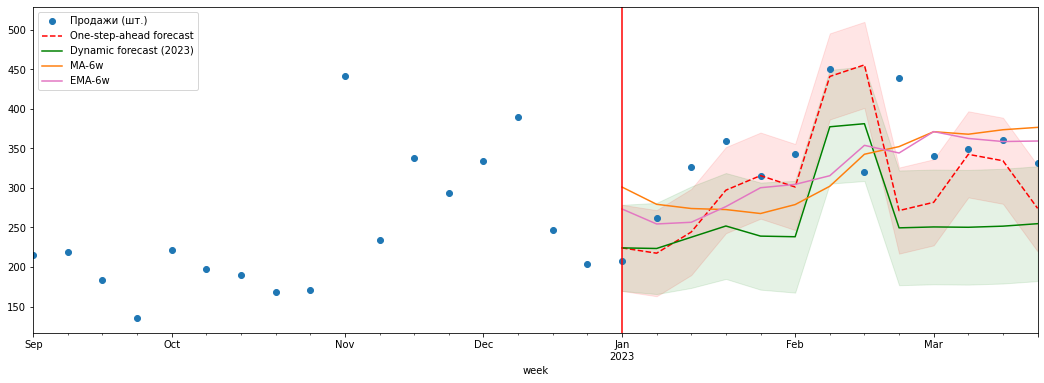

In [142]:
# Совместные графики прогнозов

fig, ax = plt.subplots(figsize=(18, 6))
model_data['2022-09-01':].plot(ax=ax, style='o', label="Продажи (шт.)")

predict.predicted_mean['2023-01-01':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)

predict_dy.predicted_mean.loc['2023-01-01':].plot(ax=ax, style='g', label='Dynamic forecast (2023)')
ax.fill_between(ci.index, dy_ci.iloc[:,0], dy_ci.iloc[:,1], color='g', alpha=0.1)


df['MA']['2023-01-01':].plot(ax=ax,color='tab:orange', label=f'MA-{depth}w')
df['EMA']['2023-01-01':].plot(ax=ax,color='tab:pink', label=f'EMA-{depth}w')

plt.axvline(x = '2022-12-31', color = 'r')

forecast['ARIMAX']=predict.predicted_mean['2023-01-01':].round().astype('int')
forecast['ARIMAX90']= dy_ci.iloc[:,1]['2023-01-01':].round().astype('int')


ax.legend()
plt.show()

In [143]:
forecast

,Fact,MA,EMA,ARIMA,ARIMA90,SARIMA,SARIMA90,ARIMAX,ARIMAX90
week,,,,,,,,,
2023-01-02,207,301,273,232,297,234,298,224,279
2023-01-09,262,279,254,214,297,218,303,217,281
2023-01-16,326,274,257,277,355,290,370,244,302
2023-01-23,360,273,276,251,293,250,303,297,319
2023-01-30,315,268,300,316,318,337,345,316,307
2023-02-06,343,279,305,373,377,368,391,301,309
2023-02-13,450,302,316,369,397,387,432,441,449
2023-02-20,320,343,354,420,416,423,441,456,454
2023-02-27,439,352,344,372,389,383,426,271,322


In [144]:
MAPE = {}
RMSE = {}


# MAPE -  mean absolute percentage error
# RMSE -  root mean square error

for col in forecast.columns[1:]:
    
    MAPE[col] = round((sum(abs(forecast['Fact']-forecast[col])/forecast['Fact'])/len(forecast)), 6)
    RMSE[col] = round(sum((forecast['Fact']-forecast[col])**2)**(0.5), 6)
    
print(MAPE)
print(RMSE)

{'MA': 0.166837, 'EMA': 0.13755, 'ARIMA': 0.134573, 'ARIMA90': 0.170858, 'SARIMA': 0.129265, 'SARIMA90': 0.210967, 'ARIMAX': 0.159495, 'ARIMAX90': 0.128054}
{'MA': 243.228288, 'EMA': 218.796709, 'ARIMA': 203.219094, 'ARIMA90': 216.515588, 'SARIMA': 192.398025, 'SARIMA90': 274.116763, 'ARIMAX': 263.026615, 'ARIMAX90': 207.513855}


In [145]:
# уровень стока

LOSS = {}
OVERAGE = {}

for col in forecast.columns[1:]:
    
    
    stock = 0
    loss = 0
    overage = 0

    for d, f in forecast[['Fact', col]].values:

        stock = f if f > stock else stock

        if stock > d:
            stock-=d
            overage += stock
        else:
            loss += d - stock
            stock = 0
    
    print(col, stock, loss, overage)
    LOSS[col] = loss
    OVERAGE[col] = overage

print(LOSS)
print(OVERAGE)

MA 45 485 241
EMA 27 445 171
ARIMA 0 404 194
ARIMA90 74 170 541
SARIMA 0 339 228
SARIMA90 122 88 778
ARIMAX 0 559 154
ARIMAX90 0 311 225
{'MA': 485, 'EMA': 445, 'ARIMA': 404, 'ARIMA90': 170, 'SARIMA': 339, 'SARIMA90': 88, 'ARIMAX': 559, 'ARIMAX90': 311}
{'MA': 241, 'EMA': 171, 'ARIMA': 194, 'ARIMA90': 541, 'SARIMA': 228, 'SARIMA90': 778, 'ARIMAX': 154, 'ARIMAX90': 225}
